# Atividade da Semana 08

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1

O número de veículos emplacados (ou seja, veículos que foram comprados novos) funciona como um indicador econômico que demonstra o poder aquisitivo da população em geral. Estes dados também são úteis como indicadores de saúde, uma vez que, uma frota mais nova, polui menos o ar e o número de casos de doenças respiratórias em grandes centros é reduzido.

Sendo assim, a partir dos dados filtrados para 2020, calcule a média, mediana, mínimo, máximo, amplitude, variância e desvio padrão.

In [31]:
# Instalando o pacote 'ipeadatapy'
%pip install ipeadatapy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Questao 1

# Carregando pacotes
import pandas as pd
import ipeadatapy

# Obtendo serie com dados sobre emplacamento de veículos
emplacamentos = ipeadatapy.timeseries('ANFAVE12_LICVEN12')
emplacamentos.reset_index(inplace=True)
emplacamentos = emplacamentos.loc[(emplacamentos["DATE"] >= "2020-01-01") & (emplacamentos["DATE"] < "2021-01-01"),
                                  "VALUE (-)"]
emplacamentos.rename("emplacamentos", inplace=True)
emplacamentos

756    171155.0
757    179925.0
758    146460.0
759     47368.0
760     52396.0
761    115726.0
762    155692.0
763    165524.0
764    188514.0
765    196045.0
766    205097.0
767    222916.0
Name: emplacamentos, dtype: float64

In [5]:
# Questao 1 (continuacao)

# Calcule as estatísticas de interesse

#media
print(sum(emplacamentos) / len(emplacamentos))

#mediana
print(emplacamentos.median())

#moda
print(emplacamentos.mode())

#variancia
print(emplacamentos.var())

#amplitude 
print(emplacamentos.max() - emplacamentos.min())

#desvio padra0
print(emplacamentos.std())




153901.5
168339.5
0      47368.0
1      52396.0
2     115726.0
3     146460.0
4     155692.0
5     165524.0
6     171155.0
7     179925.0
8     188514.0
9     196045.0
10    205097.0
11    222916.0
Name: emplacamentos, dtype: float64
3148797478.6363635
175548.0
56114.14686722381


###Questão 2

Ao observar a base de dados utilizada na questão anterior, argumente por que a moda não é uma medida útil para descrever o número de emplacamento de automóveis ao longo dos meses de 2020.

> Dê 2 cliques e insira sua resposta aqui:

Pois a moda é muito relativa, pois como exemplo da questão anterior, nenhuma das placas são iguais, ou seja a moda não existe nesse caso, amodal, por isso não seria possivel descrever a quantidade de placas X, até porque nenhum iria aparecer, pois, como são diferentes não possuem uma frequência para descrever o numero de placas repitidas e assim fazer um leventamento.

###Questão 3

O Imposto sobre Produtos Industrializados, cuja sigla é IPI, é um imposto federal, ou seja, somente a União pode instituí-lo ou modificá-lo, sobre produtos industrializados no Brasil. Abaixo, obtemos os dados da arrecadação do IPI sobre automóveis em 2020.

Calcule a correlação entre o número de veículos emplacados e o IPI arrecadado em 2020.

In [7]:
# Questao 3

# Obtendo serie com dados sobre IPI arrecadado sobre automóveis
ipi = ipeadatapy.timeseries('SRF12_IPI12')
ipi.reset_index(inplace=True)
ipi = ipi.loc[(ipi["DATE"] >= "2020-01-01") & (ipi["DATE"] < "2021-01-01"),
                                  "VALUE (R$)"]
ipi.rename("ipi", inplace=True)

carros = pd.concat([emplacamentos.reset_index(drop=True),
                    ipi.reset_index(drop=True)],
                   axis=1)
carros

,emplacamentos,ipi
0,171155.0,4785.822271
1,179925.0,4286.729125
2,146460.0,4284.937666
3,47368.0,3593.955607
4,52396.0,3251.181033
5,115726.0,3606.153437
6,155692.0,4296.958069
7,165524.0,5055.511196
8,188514.0,5670.267089
9,196045.0,6059.809830


In [8]:
# Questao 3 (continuacao)

# Calcule a correlacao entre o numero de emplacamentos e o IPI recolhido pela União.
carros.corr()


,emplacamentos,ipi
emplacamentos,1.00000,0.85234
ipi,0.85234,1.00000


###Questão 4

Com a base de dados `carros`, faça um gráfico de dispersão utilizando `plt.scatter` entre `emplacamentos` e `ipi`.

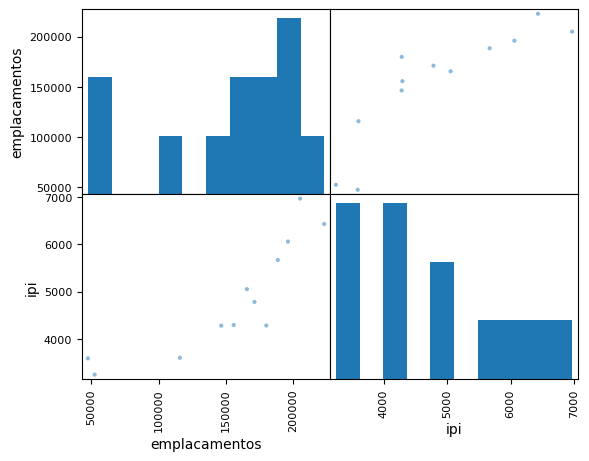

In [13]:
# Questao 4
from matplotlib import pyplot as plt

# Grafico de dispersao

pd.plotting.scatter_matrix(carros)






# Exibe o grafico
plt.show()

###Questão 5

Com base nas questões 3 e 4, como você interpretaria o valor do coeficiente de correlação observado? O que ocorre com a arrecadação do IPI quando o número de veículos emplacados aumenta?

> Dê 2 cliques e insira sua resposta aqui: 
temos uma correlação forte positiva e quando o numero de veiculos emplacados almenta a api sobe